# Introduce

我們這次要介紹決策樹，決策樹其實對人類來說是最直覺最直觀的方法，我們來考慮一個情境題，
假設媽媽要你幫她去買文具，你開始思考如果外面天氣不好下雨或是太陽太大就在家休息，
然後你看到天氣不錯的那一天，你覺得自己一個人去買文具太無聊要拉個朋友，如果小美、小萌、小慧誰有空陪你去你就願意出門，
然後開始打電話，你約到小萌有空陪你去，到了賣場挑完原子筆、膠水、筆記本、釘書機等文具，你發現香水、指甲油等等你都想要買，
你發現蛙阿錢包裡的錢不夠，你跟小萌說我帶的錢不夠可以借我一點錢嗎?
小萌說不行這些她的錢要拿來裝可愛買娃娃的，你只好回家找媽媽要錢，媽媽就問你說你到底是怎麼做事的，
交辦這麼多天東西還沒買好，去做一份流程圖再來拿錢，你就把你的策略寫下來。




於是你畫下你的決策樹。

![tree](../../../images/consume.drawio.png)

決策樹的想法是不是很直接與直觀，下面我們來看 Iris 資料集的決策樹的圖。


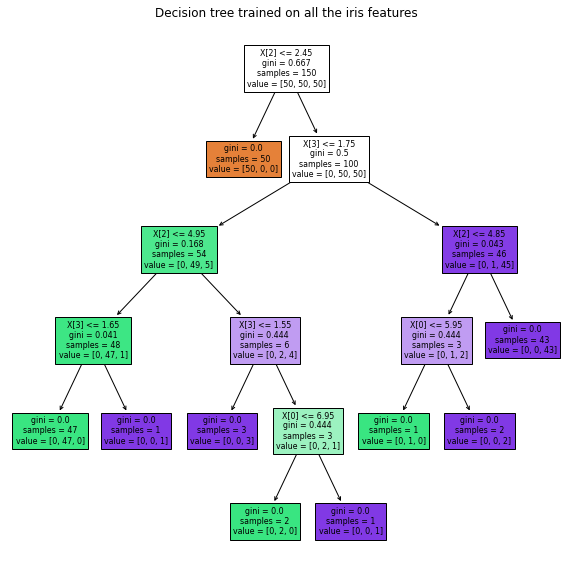

In [3]:
from sklearn.tree import plot_tree
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 10]

iris = load_iris()

classifier = DecisionTreeClassifier().fit(iris.data, iris.target)

plt.figure()
plot_tree(classifier, filled=True)
plt.title("Decision tree trained on all the iris features")
plt.show()

決策樹在機器學習的方法裡面算是最直觀的方法，下面我們要開始介紹，決策樹(decision trees)。